In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.DataFrame(columns=['filename', 'x_center', 'y_center', 'w', 'h'])
folder_path = '../dataset1/labels'
for filename in os.listdir(folder_path):
    if filename.endswith('.txt'):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, 'r') as file:
            lines = file.readlines()
        for line in lines:
            values = line.split()
            if len(values) == 5:
                cls=int(values[0])
                x_center = float(values[1])
                y_center = float(values[2])
                w = float(values[3])
                h = float(values[4])
                df = pd.concat([df, pd.DataFrame({'filename':[filename], 'cls':[cls],'x_center': [x_center], 'y_center': [y_center], 'w': [w], 'h': [h]})], ignore_index=True)

C:\Users\86159\AppData\Local\Temp\ipykernel_27864\3653870432.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame({'filename':[filename], 'cls':[cls],'x_center': [x_center], 'y_center': [y_center], 'w': [w], 'h': [h]})], ignore_index=True)


In [4]:
df.describe()

,x_center,y_center,w,h,cls
count,4497.000000,4497.000000,4497.000000,4497.000000,4497.000000
mean,0.430436,0.826607,0.221473,0.144262,2.785190
std,0.222615,0.115717,0.232751,0.111643,2.383798
min,0.012500,0.222917,0.010937,0.014815,0.000000
25%,0.258984,0.767361,0.064844,0.062500,1.000000
50%,0.410547,0.856250,0.122656,0.109722,1.000000
75%,0.582031,0.912500,0.280469,0.198611,6.000000
max,0.982422,0.988889,0.999219,0.854167,7.000000


In [5]:
df

,filename,x_center,y_center,w,h,cls
0,101-out_ori.txt,0.635938,0.503241,0.719792,0.313889,5.0
1,103-out_ori.txt,0.554948,0.698148,0.890104,0.575926,5.0
2,103-out_ori.txt,0.413281,0.922222,0.352604,0.074074,0.0
3,103-out_ori.txt,0.428646,0.796759,0.042708,0.173148,1.0
4,103-out_ori.txt,0.844010,0.777778,0.205729,0.327778,1.0
...,...,...,...,...,...,...
4492,78-out_ori.txt,0.864323,0.625926,0.265104,0.048148,6.0
4493,79-out_ori.txt,0.865104,0.815278,0.255208,0.065741,6.0
4494,79-out_ori.txt,0.786979,0.681019,0.185417,0.045370,6.0
4495,79-out_ori.txt,0.094271,0.543519,0.110417,0.088889,6.0


In [7]:
df[df['cls']==1]

,filename,x_center,y_center,w,h,cls
3,103-out_ori.txt,0.428646,0.796759,0.042708,0.173148,1.0
4,103-out_ori.txt,0.844010,0.777778,0.205729,0.327778,1.0
8,105-out_ori.txt,0.877604,0.519444,0.159375,0.122222,1.0
12,108-out_ori.txt,0.879948,0.568056,0.213021,0.206481,1.0
15,110-out_ori.txt,0.866146,0.591667,0.175000,0.233333,1.0
...,...,...,...,...,...,...
4433,24632-out_ori.txt,0.078125,0.877778,0.150000,0.119444,1.0
4434,24632-out_ori.txt,0.061719,0.747222,0.120313,0.083333,1.0
4438,24635-out_ori.txt,0.108594,0.884722,0.198437,0.222222,1.0
4467,63-out_ori.txt,0.675260,0.682870,0.110937,0.275000,1.0


[213, 2483, 66, 82, 92, 95, 1441, 25]


<BarContainer object of 8 artists>

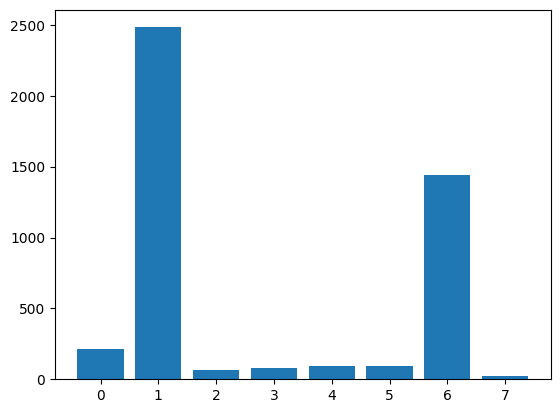

In [10]:
count=[len(df[df['cls']==i]) for i in range(8)]
print(count)
plt.bar(range(8),count)

In [8]:
df[df['y_center']<0.5]

,filename,x_center,y_center,w,h
37,122-out_ori.txt,0.436458,0.444444,0.026042,0.055556
38,122-out_ori.txt,0.461719,0.380093,0.027604,0.047222
39,122-out_ori.txt,0.545833,0.375000,0.011458,0.027778
40,122-out_ori.txt,0.521354,0.418519,0.310417,0.027778
48,128-out_ori.txt,0.499219,0.486111,0.061979,0.133333
...,...,...,...,...,...
4476,64-out_ori.txt,0.279427,0.433333,0.259896,0.025926
4479,65-out_ori.txt,0.232552,0.444444,0.259896,0.031481
4482,65-out_ori.txt,0.655729,0.466204,0.078125,0.141667
4487,66-out_ori.txt,0.196615,0.473611,0.290104,0.025000


In [33]:
import numpy as np
import pandas as pd
df1=pd.DataFrame(index=[i for i in range(1,15)], columns=[i for i in range(1,15)])
for i in df1.index:
    for j in df1.columns:
        ccc=j * (2/5*np.arctan(i-j)+1)/i
        df1.loc[i, j] = ccc if ccc<1 else 1.0
        # df1.loc[i, j] = min(i, j)/i
df1

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.65708,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,0.480953,0.876106,1.0,0.914454,0.928568,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.374905,0.72143,0.985619,1.0,0.857301,0.835711,0.875668,0.939346,1.0,1.0,1.0,1.0,1.0,1.0
5,0.306065,0.599847,0.865716,1.0,1.0,0.823009,0.779997,0.800611,0.845411,0.901279,0.96303,1.0,1.0,1.0
6,0.258227,0.510109,0.749809,0.961906,1.0,1.0,0.800148,0.742854,0.750573,0.782788,0.826173,0.875482,0.928287,0.983321
7,0.22318,0.442674,0.655854,0.856925,1.0,1.0,1.0,0.783818,0.716324,0.714831,0.738057,0.772525,0.812947,0.856881
8,0.196445,0.390565,0.58101,0.765164,0.937261,1.0,1.0,1.0,0.771571,0.696426,0.688025,0.704509,0.73229,0.766047
9,0.175397,0.349235,0.520753,0.688605,0.850182,0.999746,1.0,1.0,1.0,0.762045,0.68095,0.667176,0.678416,0.700995
10,0.158406,0.315715,0.471468,0.624904,0.77468,0.918196,1.0,1.0,1.0,1.0,0.754425,0.668569,0.650496,0.657542


In [34]:
import numpy as np
import pandas as pd
df1=pd.DataFrame(index=[i for i in range(1,15)], columns=[i for i in range(1,15)])
for i in df1.index:
    for j in df1.columns:
        df1.loc[i, j] = min(i, j) * (2/5*np.arctan(i-min(i, j))+1)/i
        # df1.loc[i, j] = min(i, j)/i*2/(1+np.exp(min(i,j)-i))
df1

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.65708,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,0.480953,0.876106,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.374905,0.72143,0.985619,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,0.306065,0.599847,0.865716,1.051327,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6,0.258227,0.510109,0.749809,0.961906,1.095133,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7,0.22318,0.442674,0.655854,0.856925,1.030614,1.126422,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8,0.196445,0.390565,0.58101,0.765164,0.937261,1.082145,1.149889,1.0,1.0,1.0,1.0,1.0,1.0,1.0
9,0.175397,0.349235,0.520753,0.688605,0.850182,0.999746,1.122224,1.168142,1.0,1.0,1.0,1.0,1.0,1.0
10,0.158406,0.315715,0.471468,0.624904,0.77468,0.918196,1.049733,1.154288,1.182743,1.0,1.0,1.0,1.0,1.0


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
data = pd.read_csv('sc1.txt', sep=' ', header=None)
data.iloc[:,1]=data.iloc[:,1]*100
data[1]=data[1].astype(int)
data.iloc[:,2]=data.iloc[:,2]*100
data[2]=data[2].astype(int)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[1], data[2], data[0], c='r', marker='.')
ax.set_xlabel('iou')
ax.set_ylabel('conf')
ax.set_zlabel('f1')
plt.show()

<IPython.core.display.Javascript object>

In [15]:
import pandas as pd
data = pd.read_csv('sc1.txt', sep=' ', header=None)
data.iloc[:,1]=data.iloc[:,1]*100
data[1]=data[1].astype(int)
data.iloc[:,2]=data.iloc[:,2]*100
data[2]=data[2].astype(int)
data[data[0]>0.495]

,0,1,2
316,0.495508,9,21
391,0.495394,10,21
466,0.496765,11,21
541,0.496007,12,21
616,0.496484,13,21
...,...,...,...
3165,0.495221,47,20
3166,0.499160,47,21
3241,0.498244,48,21
3315,0.496889,49,20
